# SALARY

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("Salaries.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [7]:
df['rank']=le.fit_transform(df['rank'])
df['sex']=le.fit_transform(df['sex'])
df['discipline']=le.fit_transform(df['discipline'])

In [8]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329
396,1,0,8,4,1,81035


In [9]:
df.sample(4)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
333,2,1,33,19,1,145098
244,2,0,19,23,1,84273
327,2,1,37,37,1,151650
11,1,1,7,2,1,79800


In [10]:
type(df.columns)

pandas.core.indexes.base.Index

In [11]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [12]:
list(df.columns)

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [13]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [14]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:xlabel='rank', ylabel='salary'>

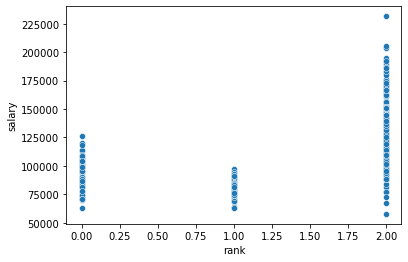

In [17]:
import seaborn as sns
sns.scatterplot(x="rank", y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

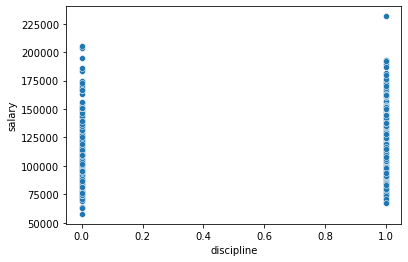

In [18]:
sns.scatterplot(x="discipline", y="salary", data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

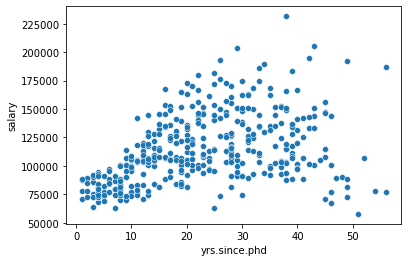

In [19]:
sns.scatterplot(x="yrs.since.phd",y="salary", data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

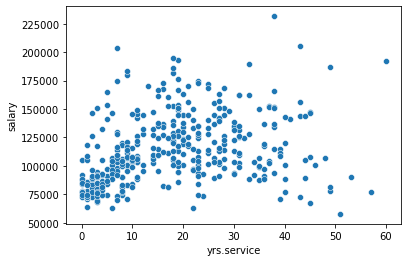

In [20]:
sns.scatterplot(x="yrs.service", y="salary", data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

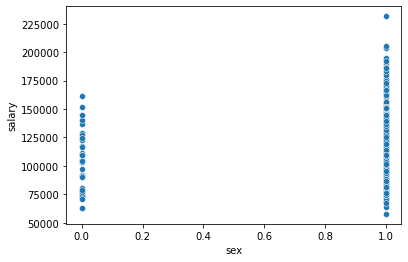

In [21]:
sns.scatterplot(x="sex", y="salary", data=df)

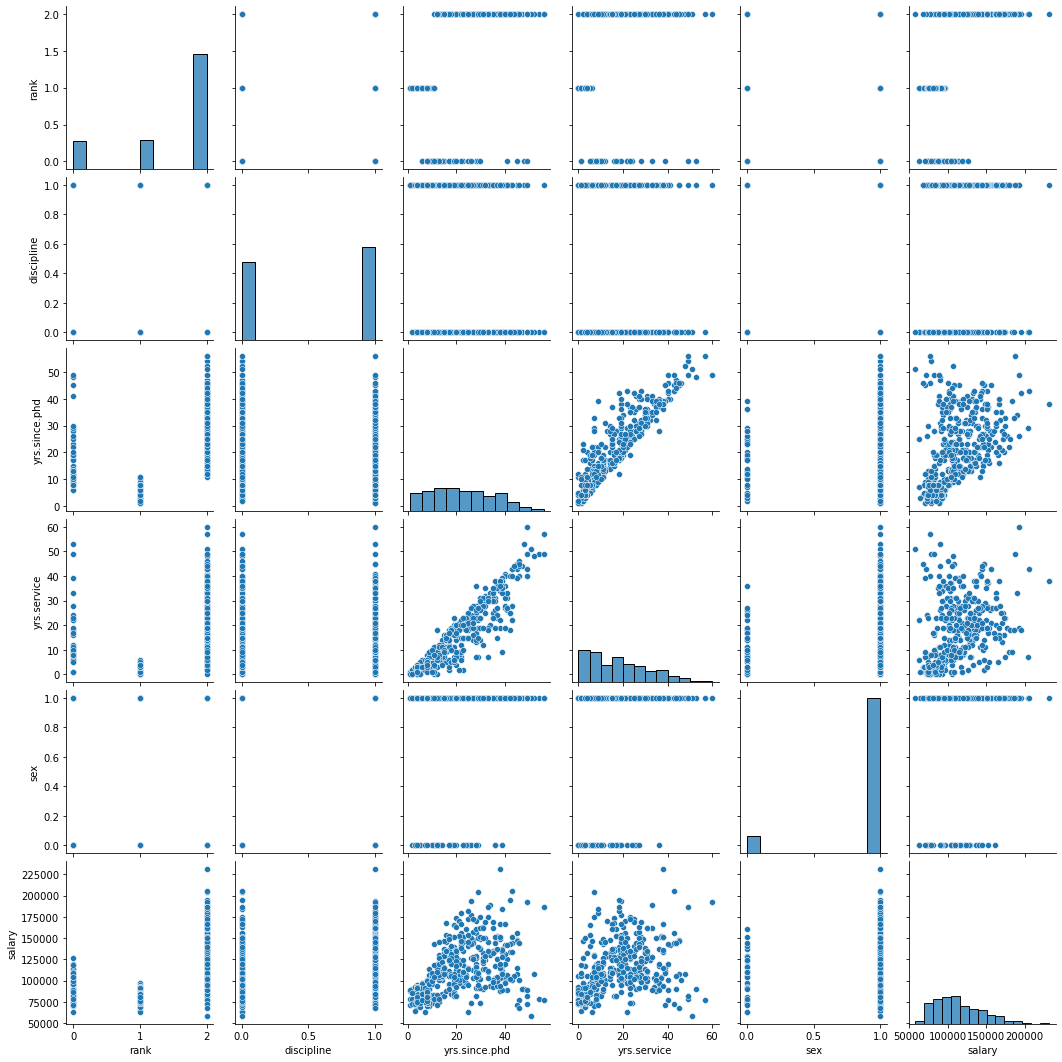

In [22]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

In [23]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [24]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

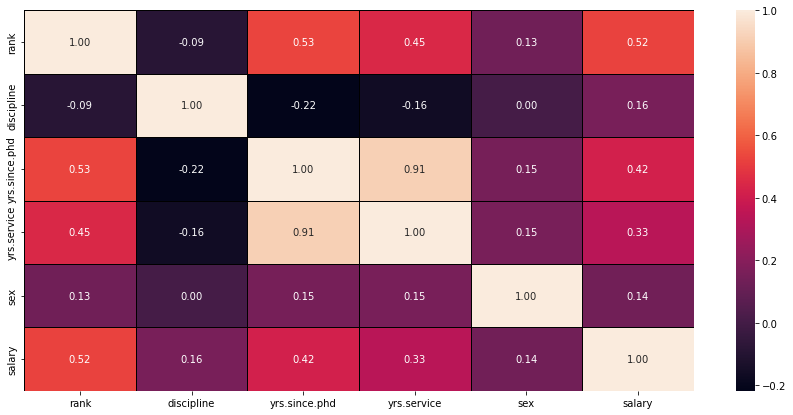

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

In [26]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


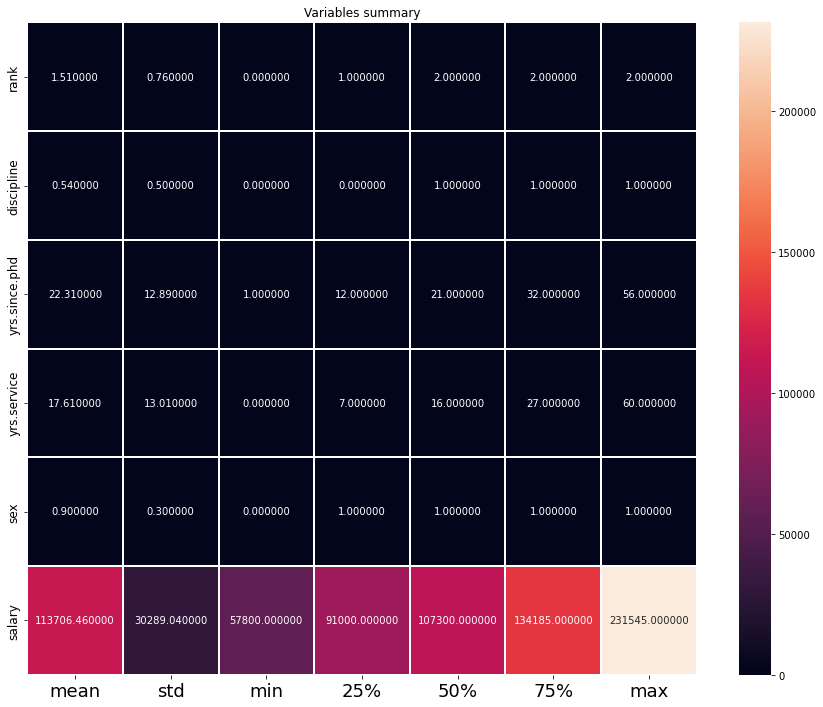

In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


In [29]:
import warnings
warnings.filterwarnings('ignore')

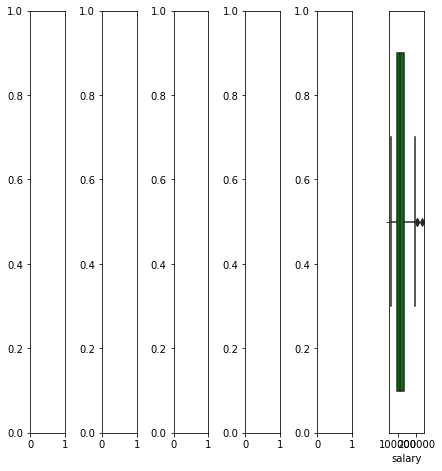

In [30]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
sns.boxplot(df[collist[i]], color='green', orient='h')
plt.tight_layout()

In [31]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

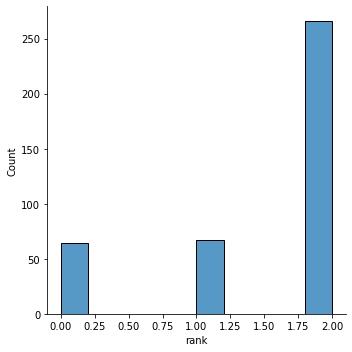

In [32]:
sns.displot(df["rank"])

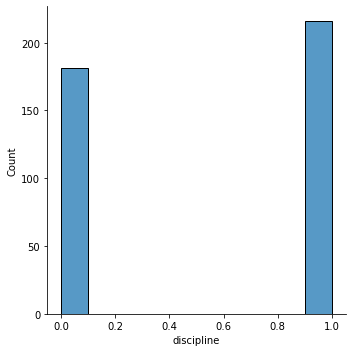

In [33]:
sns.displot(df["discipline"])

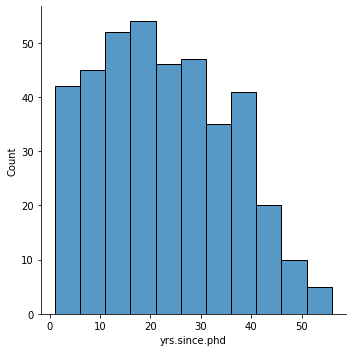

In [34]:
sns.displot(df["yrs.since.phd"])

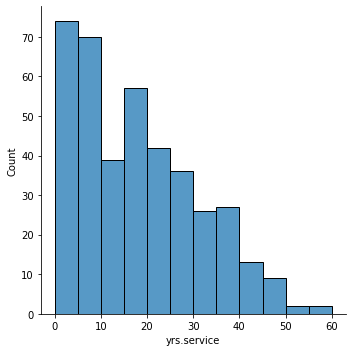

In [35]:
sns.displot(df["yrs.service"])

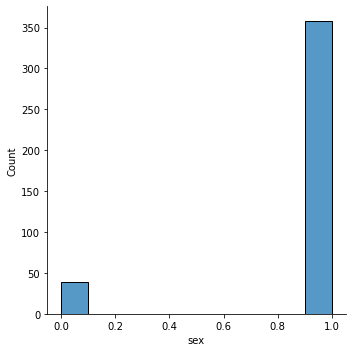

In [36]:
sns.displot(df["sex"])

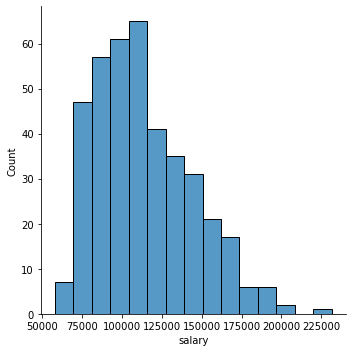

In [37]:
sns.displot(df["salary"])

In [38]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

In [39]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [40]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 6)

In [41]:
treshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [42]:
np.abs(zscore(df)<0).sum()

rank             131
discipline       181
yrs.since.phd    213
yrs.service      206
sex               39
salary           229
dtype: int64

In [43]:
zscore(df)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,-0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,-0.179854,-0.124300,0.330058,1.966672
2,-0.672564,0.915403,-1.422982,-1.125098,0.330058,-1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,-1.092415,0.830187,0.953483,0.330058,-0.350418
393,0.649257,-1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,-1.092415,1.529446,0.568560,0.330058,-0.395640
395,0.649257,-1.092415,0.208623,-0.201284,0.330058,-0.607502


In [44]:
np.abs(zscore(df))

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,0.649257,0.915403,0.257550,0.029669,0.330058,0.860919
1,0.649257,0.915403,0.179854,0.124300,0.330058,1.966672
2,0.672564,0.915403,1.422982,1.125098,0.330058,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.330058,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.330058,0.918768
...,...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.330058,0.350418
393,0.649257,1.092415,0.674796,0.106654,0.330058,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.330058,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.330058,0.607502


In [45]:
len(np.where(z>3)[0]) 

43

In [46]:
df.iloc[133]

rank                 1
discipline           0
yrs.since.phd        3
yrs.service          1
sex                  0
salary           72500
Name: 133, dtype: int64

In [47]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("Total_dropped_rows",df.shape[0]-df_new.shape[0])

Old Dataframe (397, 6)
New Dataframe (354, 6)
Total_dropped_rows 43


In [48]:
loss_percentage=(397-354)/397*100
print(loss_percentage,' %')

10.831234256926953  %


In [49]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [50]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [52]:
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [55]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)!=round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random_state:",i)
        print("Training accuracy_score is:", accuracy_score(y_train,pred_train)*100)
        print("Testing accuract_score is:", accuracy_score(y_test,pred_test)*100)
    

At random state 0 The model performs well
At random_state: 0
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 1 The model performs well
At random_state: 1
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 2 The model performs well
At random_state: 2
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 3 The model performs well
At random_state: 3
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 4 The model performs well
At random_state: 4
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 5 The model performs well
At random_state: 5
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 6 The model performs well
At random_state: 6
Training accuracy_score is: 7.773851590106007
Testing

At random state 57 The model performs well
At random_state: 57
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 58 The model performs well
At random_state: 58
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 59 The model performs well
At random_state: 59
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random state 60 The model performs well
At random_state: 60
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 0.0
At random state 61 The model performs well
At random_state: 61
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 62 The model performs well
At random_state: 62
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 63 The model performs well
At random_state: 63
Training accuracy_score 

At random state 111 The model performs well
At random_state: 111
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 1.4084507042253522
At random state 112 The model performs well
At random_state: 112
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 113 The model performs well
At random_state: 113
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 114 The model performs well
At random_state: 114
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 0.0
At random state 115 The model performs well
At random_state: 115
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 116 The model performs well
At random_state: 116
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 2.8169014084507045
At random state 117 The model performs well
At random_state: 117
Training accuracy_score i

At random state 166 The model performs well
At random_state: 166
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 167 The model performs well
At random_state: 167
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 1.4084507042253522
At random state 168 The model performs well
At random_state: 168
Training accuracy_score is: 8.8339222614841
Testing accuract_score is: 1.4084507042253522
At random state 169 The model performs well
At random_state: 169
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 0.0
At random state 170 The model performs well
At random_state: 170
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 171 The model performs well
At random_state: 171
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 172 The model performs well
At random_state: 172
Training accuracy_score is:

At random state 220 The model performs well
At random_state: 220
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 221 The model performs well
At random_state: 221
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 222 The model performs well
At random_state: 222
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 2.8169014084507045
At random state 223 The model performs well
At random_state: 223
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 2.8169014084507045
At random state 224 The model performs well
At random_state: 224
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 225 The model performs well
At random_state: 225
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 226 The model performs well
At random_state: 

At random state 274 The model performs well
At random_state: 274
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 275 The model performs well
At random_state: 275
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 276 The model performs well
At random_state: 276
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 277 The model performs well
At random_state: 277
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 278 The model performs well
At random_state: 278
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 279 The model performs well
At random_state: 279
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random state 280 The model performs well
At random_state: 280
Training a

At random state 328 The model performs well
At random_state: 328
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 329 The model performs well
At random_state: 329
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 330 The model performs well
At random_state: 330
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 331 The model performs well
At random_state: 331
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 332 The model performs well
At random_state: 332
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 333 The model performs well
At random_state: 333
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 0.0
At random state 334 The model performs well
At random_state: 334
Training accuracy_score is: 8.12720848056537
Testing acc

At random state 384 The model performs well
At random_state: 384
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 1.4084507042253522
At random state 385 The model performs well
At random_state: 385
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 386 The model performs well
At random_state: 386
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 2.8169014084507045
At random state 387 The model performs well
At random_state: 387
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 1.4084507042253522
At random state 388 The model performs well
At random_state: 388
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 389 The model performs well
At random_state: 389
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 4.225352112676056
At random state 390 The model performs well
At random_state: 390

At random state 438 The model performs well
At random_state: 438
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random state 439 The model performs well
At random_state: 439
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 440 The model performs well
At random_state: 440
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 0.0
At random state 441 The model performs well
At random_state: 441
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 1.4084507042253522
At random state 442 The model performs well
At random_state: 442
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 443 The model performs well
At random_state: 443
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 444 The model performs well
At random_state: 444
Training accuracy_score is: 7.7738515901

Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 493 The model performs well
At random_state: 493
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 494 The model performs well
At random_state: 494
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 495 The model performs well
At random_state: 495
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 0.0
At random state 496 The model performs well
At random_state: 496
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 497 The model performs well
At random_state: 497
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 0.0
At random state 498 The model performs well
At random_state: 498
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state

At random state 547 The model performs well
At random_state: 547
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 2.8169014084507045
At random state 548 The model performs well
At random_state: 548
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 2.8169014084507045
At random state 549 The model performs well
At random_state: 549
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 4.225352112676056
At random state 550 The model performs well
At random_state: 550
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 551 The model performs well
At random_state: 551
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 552 The model performs well
At random_state: 552
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 553 The model performs well
At random_state: 

At random state 601 The model performs well
At random_state: 601
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 602 The model performs well
At random_state: 602
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 2.8169014084507045
At random state 603 The model performs well
At random_state: 603
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 1.4084507042253522
At random state 604 The model performs well
At random_state: 604
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.4084507042253522
At random state 605 The model performs well
At random_state: 605
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 606 The model performs well
At random_state: 606
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 607 The model performs well
At random_state: 

Testing accuract_score is: 0.0
At random state 657 The model performs well
At random_state: 657
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 2.8169014084507045
At random state 658 The model performs well
At random_state: 658
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 0.0
At random state 659 The model performs well
At random_state: 659
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 1.4084507042253522
At random state 660 The model performs well
At random_state: 660
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 661 The model performs well
At random_state: 661
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random state 662 The model performs well
At random_state: 662
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 0.0
At random state 663 The model performs well
At random_state: 663
Training ac

Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 711 The model performs well
At random_state: 711
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 2.8169014084507045
At random state 712 The model performs well
At random_state: 712
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 713 The model performs well
At random_state: 713
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 714 The model performs well
At random_state: 714
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random state 715 The model performs well
At random_state: 715
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 716 The model performs well
At random_state: 716
Training accuracy_score is: 6.713780918727916
Testing accur

Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 2.8169014084507045
At random state 766 The model performs well
At random_state: 766
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 767 The model performs well
At random_state: 767
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 768 The model performs well
At random_state: 768
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 0.0
At random state 769 The model performs well
At random_state: 769
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 2.8169014084507045
At random state 770 The model performs well
At random_state: 770
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 2.8169014084507045
At random state 771 The model performs well
At random_state: 771
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 1.408450704225352

Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 821 The model performs well
At random_state: 821
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 2.8169014084507045
At random state 822 The model performs well
At random_state: 822
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 823 The model performs well
At random_state: 823
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 0.0
At random state 824 The model performs well
At random_state: 824
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 2.8169014084507045
At random state 825 The model performs well
At random_state: 825
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 1.4084507042253522
At random state 826 The model performs well
At random_state: 826
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 1.4084507042253522
At random stat

At random state 875 The model performs well
At random_state: 875
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 876 The model performs well
At random_state: 876
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 877 The model performs well
At random_state: 877
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 878 The model performs well
At random_state: 878
Training accuracy_score is: 8.480565371024735
Testing accuract_score is: 1.4084507042253522
At random state 879 The model performs well
At random_state: 879
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 880 The model performs well
At random_state: 880
Training accuracy_score is: 6.36042402826855
Testing accuract_score is: 2.8169014084507045
At random state 881 The model performs well
At random_state: 881
Training accuracy_score i

At random state 929 The model performs well
At random_state: 929
Training accuracy_score is: 8.480565371024735
Testing accuract_score is: 0.0
At random state 930 The model performs well
At random_state: 930
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 931 The model performs well
At random_state: 931
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 0.0
At random state 932 The model performs well
At random_state: 932
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 933 The model performs well
At random_state: 933
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 934 The model performs well
At random_state: 934
Training accuracy_score is: 6.713780918727916
Testing accuract_score is: 1.4084507042253522
At random state 935 The model performs well
At random_state: 935
Training accuracy_score is: 7.06713780

At random state 985 The model performs well
At random_state: 985
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 986 The model performs well
At random_state: 986
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 987 The model performs well
At random_state: 987
Training accuracy_score is: 7.773851590106007
Testing accuract_score is: 0.0
At random state 988 The model performs well
At random_state: 988
Training accuracy_score is: 7.06713780918728
Testing accuract_score is: 0.0
At random state 989 The model performs well
At random_state: 989
Training accuracy_score is: 8.12720848056537
Testing accuract_score is: 1.4084507042253522
At random state 990 The model performs well
At random_state: 990
Training accuracy_score is: 7.420494699646643
Testing accuract_score is: 1.4084507042253522
At random state 991 The model performs well
At random_state: 991
Training accuracy_score is: 6.36042402826

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=986)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

       72500       0.00      0.00      0.00       1.0
       73000       0.00      0.00      0.00       0.0
       73800       0.00      0.00      0.00       1.0
       74500       0.00      0.00      0.00       1.0
       75996       0.00      0.00      0.00       1.0
       78162       0.00      0.00      0.00       0.0
       78182       0.00      0.00      0.00       1.0
       80225       0.00      0.00      0.00       1.0
       81500       0.00      0.00      0.00       0.0
       81800       0.00      0.00      0.00       0.0
       82600       0.00      0.00      0.00       1.0
       84240       0.00      0.00      0.00       1.0
       86100       0.00      0.00      0.00       1.0
       86250       0.00      0.00      0.00       1.0
       86373       0.00      0.00      0.00       1.0
       88709       0.00      0.00      0.00       1.0
       88825       0.00      0.00      0.00       1.0
       89942       0.00    

In [58]:
pred_lr= lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,4):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:",j)
    print("Cross Validation Score is:", lsc*100)
    print("accuracy_score is:", lss*100)
    print("\n")

At cv: 2
Cross Validation Score is: 2.2598870056497176
accuracy_score is: 7.042253521126761


At cv: 3
Cross Validation Score is: 1.4124293785310735
accuracy_score is: 7.042253521126761




In [59]:
lsscore_selected= cross_val_score(lr,x,y,cv=4).mean
print("The cv score is:", lsscore_selected,"\n The accuracy score is:",lss)

The cv score is: <built-in method mean of numpy.ndarray object at 0x0000027F94090B70> 
 The accuracy score is: 0.07042253521126761


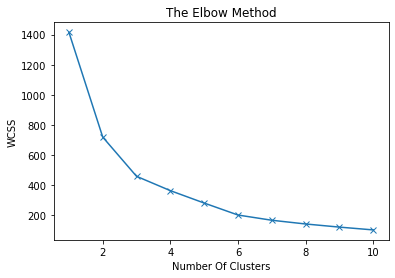

In [60]:
from sklearn.cluster import KMeans

wcss= []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='x')
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
kmeans=KMeans(n_clusters= 5, init= 'k-means++')
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[2 2 1 2 2 1 2 2 2 1 1 1 1 2 2 2 3 3 3 3 3 0 0 3 1 1 2 2 1 2 1 2 1 2 1 2 1
 2 2 2 2 1 2 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 1 2
 2 1 2 1 1 1 2 2 1 1 2 2 2 2 2 2 4 3 4 4 4 3 0 4 4 3 0 3 3 4 0 3 0 0 3 3 3
 4 4 3 0 0 0 4 0 4 4 0 1 2 2 1 2 1 2 1 2 1 2 1 1 1 2 1 2 1 1 1 2 2 2 1 2 1
 2 2 2 1 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 3 1 1 1 2 2 1 2 2 2 2 2 2 2 1 2
 1 2 2 2 1 2 2 1 2 2 2 1 2 3 0 4 4 0 3 3 4 0 0 3 0 4 3 3 0 0 3 0 0 0 3 0 0
 4 0 4 4 3 3 3 3 3 3 3 3 0 3 0 3 3 4 4 0 3 3 0 3 3 3 3 3 4 3 3 4 3 4 0 3 0
 4 0 3 0 0 3 3 3 0 0 0 3 3 4 3 4 0 0 0 0 3 0 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 1 2 3 3 4 0 3 4 3 0 4 3 3 4 0 0 3 0 3
 4 4 3 4 4 0 4 3 0 0 3 0 3 0 3 0 3 0 3 0 4]


In [70]:
kmeans.labels_

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 0,
       0, 3, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 4, 3, 4, 4, 4, 3, 0, 4, 4, 3, 0, 3, 3, 4, 0, 3, 0, 0, 3, 3,
       3, 4, 4, 3, 0, 0, 0, 4, 0, 4, 4, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       3, 0, 4, 4, 0, 3, 3, 4, 0, 0, 3, 0, 4, 3, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 4, 0, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 4, 4, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 0, 3, 0, 4, 0, 3, 0, 0,
       3, 3, 3, 0, 0, 0, 3, 3, 4, 3, 4, 0, 0, 0, 0, 3, 0, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [71]:
kmeans.cluster_centers_

array([[ 0.66261867, -1.09487797,  0.04567383, -0.11959684,  0.        ],
       [-1.44098963,  0.9133438 , -1.23302508, -1.08328364,  0.        ],
       [ 0.64288343,  0.9133438 ,  0.31496359,  0.3093487 ,  0.        ],
       [ 0.52586175, -1.03830834,  1.13798506,  1.14004736,  0.        ],
       [-1.48290751, -1.09487797, -1.03253558, -1.0473551 ,  0.        ]])

In [80]:
x[y_kmeans==0]

array([[ 0.66261867, -1.09487797,  0.20986166,  0.28476333,  0.        ],
       [ 0.66261867, -1.09487797, -0.0141423 , -0.65538962,  0.        ],
       [ 0.66261867, -1.09487797, -0.09133723,  0.06567291,  0.        ],
       [ 0.66261867, -1.09487797, -0.0141423 , -0.54947372,  0.        ],
       [ 0.66261867, -1.09487797, -0.58783385, -0.09266578,  0.        ],
       [ 0.66261867, -1.09487797,  0.20986166,  0.48616089,  0.        ],
       [ 0.66261867, -1.09487797,  0.20986166,  0.48616089,  0.        ],
       [ 0.66261867, -1.09487797, -0.09133723,  0.21391071,  0.        ],
       [ 0.66261867, -1.09487797, -0.41516959, -0.09266578,  0.        ],
       [ 0.66261867, -1.09487797, -0.33173246, -0.09266578,  0.        ],
       [ 0.66261867, -1.09487797, -0.0141423 ,  0.21391071,  0.        ],
       [ 0.66261867, -1.09487797, -0.16993349, -0.35414312,  0.        ],
       [ 0.66261867, -1.09487797, -0.09133723,  0.35366321,  0.        ],
       [ 0.66261867, -1.09487797, -0.4

In [81]:
dd=pd.DataFrame(data=x[y_kmeans==1])

In [74]:
dd

,0,1,2,3,4
0,0.662619,-1.094878,0.209862,0.284763,0.0
1,0.662619,-1.094878,-0.014142,-0.655390,0.0
2,0.662619,-1.094878,-0.091337,0.065673,0.0
3,0.662619,-1.094878,-0.014142,-0.549474,0.0
4,0.662619,-1.094878,-0.587834,-0.092666,0.0
5,0.662619,-1.094878,0.209862,0.486161,0.0
6,0.662619,-1.094878,0.209862,0.486161,0.0
7,0.662619,-1.094878,-0.091337,0.213911,0.0
8,0.662619,-1.094878,-0.415170,-0.092666,0.0
9,0.662619,-1.094878,-0.331732,-0.092666,0.0


In [82]:
dd.to_csv('filename_salaries2.csv')

In [83]:
import pickle
filename= 'inhouse_salaries.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [84]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"Original":a,"Predicted":predicted}, index= range(len(a)))
df_com

,Original,Predicted
0,162200,101000
1,92000,92000
2,128800,163200
3,150000,101000
4,93418,93418
...,...,...
66,150564,163200
67,150500,163200
68,170000,101000
69,119800,92000
